In [24]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, label_binarize
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score
from scipy.optimize import linear_sum_assignment as linear_assignment

In [3]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')#.truncate(after=100000)
df.head()

Unnamed: 0  acousticness                                   artists  \
0           0      1.332319                       ['Carl Woitschach']   
1           1      1.329664  ['Robert Schumann', 'Vladimir Horowitz']   
2           2      0.294154                   ['Seweryn Goszczyński']   
3           3      1.332319                      ['Francisco Canaro']   
4           4      1.319044  ['Frédéric Chopin', 'Vladimir Horowitz']   

   danceability  duration_ms    energy  explicit                      id  \
0      0.968662       158648 -1.097999         0  6KbQ3uYMLKb5jDxLF7wYDD   
1     -0.907636       282133 -1.776785         0  6KuQTIu1KoTTkLXKrwlLPV   
2      1.202486       104300 -1.004503         0  6L63VW0PibdM1HDSBoqnoM   
3      1.384983       180760 -1.341091         0  6M94FkXd15sOAOQYRnWPN8   
4     -1.871449       687733 -1.064341         0  6N6tiFZ9vLTSOIxkj8qKrd   

   instrumentalness  key  ...  speechiness     tempo   valence  year  \
0          1.296562   10  ...    -0.289840  0.049500  0.940924  1928   
1          2.389253    8  ...    -0.319186 -1.073199 -1.735454  1928   
2         -0.523513    5  ...     5.568626 -0.317996  1.325822  1928   
3          2.343994    1  ...    -0.009722 -0.291114  0.716082  1928   
4          2.411883   11  ...    -0.344530 -1.783425 -1.763655  1928   

   year_bins year_bins_5  popularity_cut  popularity_cut_labels  \
0          0           0               0           (-0.1, 25.0]   
1          0           0               0           (-0.1, 25.0]   
2          0           0               0           (-0.1, 25.0]   
3          0           0               0           (-0.1, 25.0]   
4          0           0               0           (-0.1, 25.0]   

   popularity_qcut  popularity_qcut_labels  
0                0            (-0.1, 25.0]  
1                0            (-0.1, 25.0]  
2                0            (-0.1, 25.0]  
3                0            (-0.1, 25.0]  
4                0            (-0.1, 25.0]  

[5 rows x 26 columns]

In [4]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
        'liveness', 'loudness','speechiness','tempo','valence']
# features = ['acousticness', 'danceability', 'energy',
#             'liveness', 'loudness','speechiness','tempo']
df_kmeans = df[features]

Explained variation per principal component: [0.34351661 0.15115648 0.12753335]


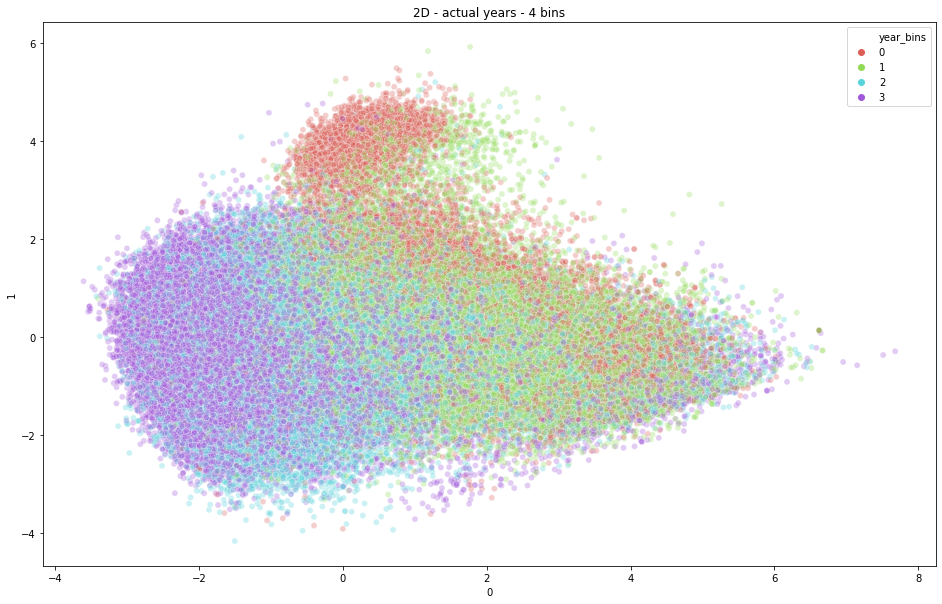

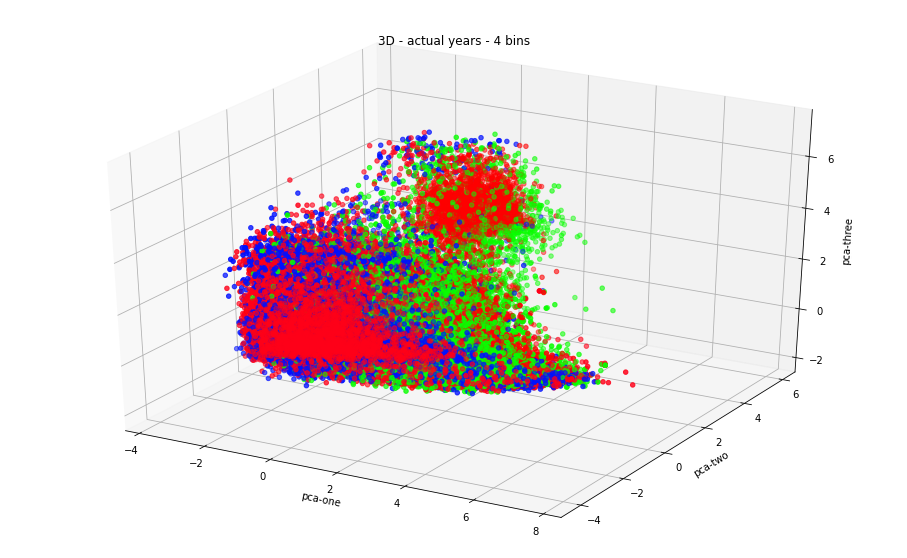

In [6]:
### PCA with N Components = 3
### Also performed K Means
def doPCA(df):
    pca = PCA(n_components = 3)
    X = pca.fit_transform(df[features])
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    X_reduced = pd.DataFrame(X)
    X_reduced['year_bins'] = df['year_bins']
    X_reduced['popularity_cut'] = df['popularity_cut']
    X_reduced['popularity_qcut'] = df['popularity_qcut']
    X_new = pca.inverse_transform(X)
#     print(X_new.shape, X_reduced.shape)
    return X_reduced, X_new

def doKmeans(X_new,X_reduced, n_clus=5):
    kmeans = KMeans(n_clusters=n_clus).fit(X_new)
    X_reduced['labels'] = kmeans.labels_

    score = metrics.silhouette_score(X_new, kmeans.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)
    return X_reduced, score
    

def plot2d(dataframe, color_variable, title,k , color="hls"):
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x=0, y=1,
        hue=color_variable,
        palette=sns.color_palette(color, k),
        data=dataframe,
        legend="full",
        alpha=0.3)
    plt.title("2D - "+title)
#     plt.savefig('PCA_'+title+'.png')
    
def plot3d(df, color_variable,title, color='hsv'):
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax.scatter(
        xs=df[0], 
        ys=df[1], 
        zs=df[2], 
        c=df[color_variable], 
        cmap=color
    )
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    ax.set_title("3D - "+title)
    plt.show()
#     plt.savefig('PCA_3d_'+title+'.png')

X_reduced, X_new = doPCA(df)
plot2d(X_reduced, "year_bins","actual years - 4 bins", 4)
plot3d(X_reduced, "year_bins", "actual years - 4 bins")

=========== KMEANS for K=2 =============
Explained variation per principal component: [0.34351661 0.15115648 0.12753335]
Silhouetter Score: 0.373


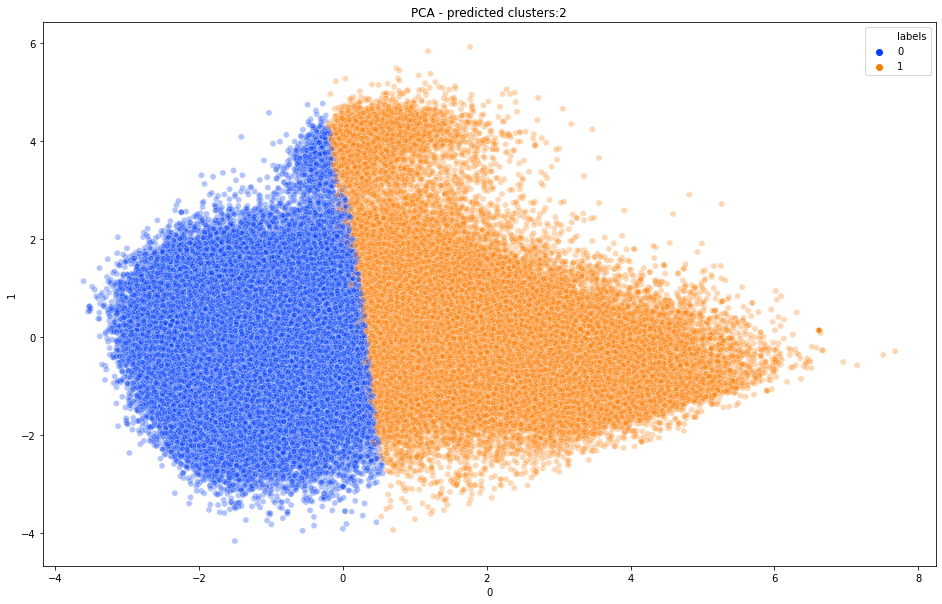

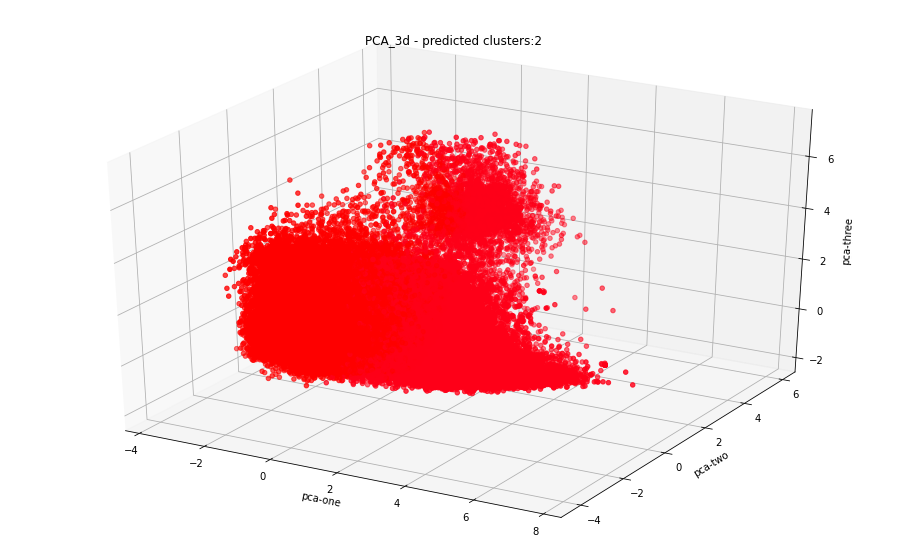

=========== KMEANS for K=3 =============
Explained variation per principal component: [0.34351661 0.15115648 0.12753335]
Silhouetter Score: 0.393


<Figure size 432x288 with 0 Axes>

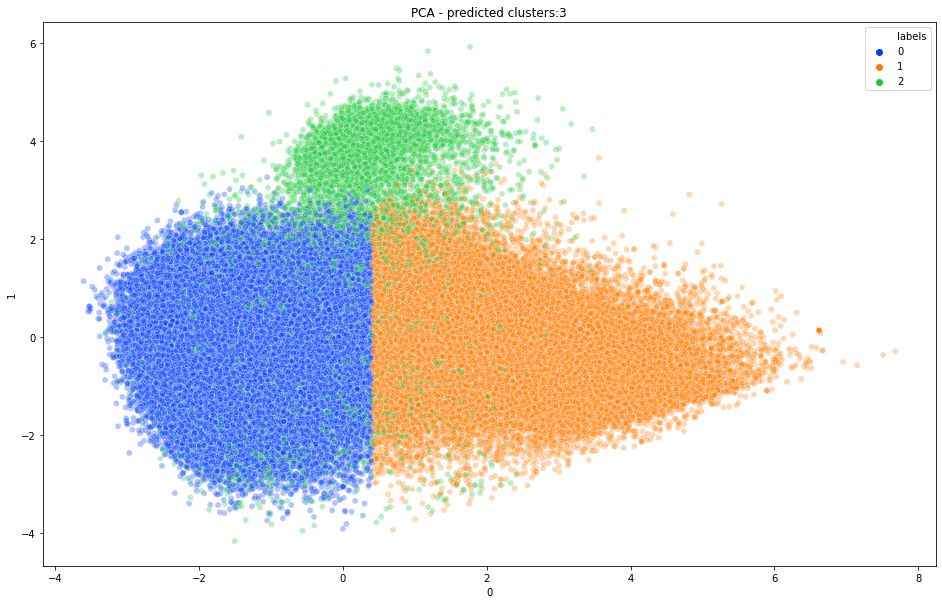

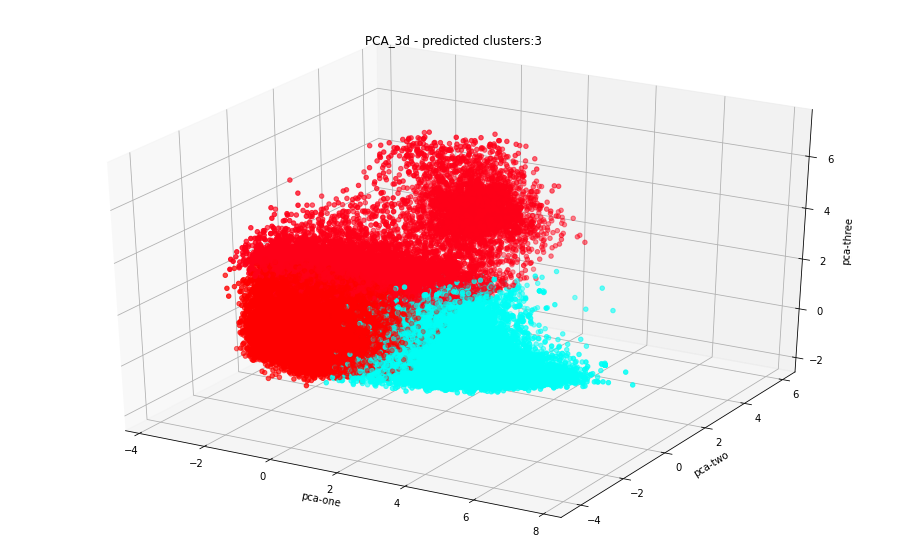

=========== KMEANS for K=4 =============
Explained variation per principal component: [0.34351661 0.15115648 0.12753335]
Silhouetter Score: 0.321


<Figure size 432x288 with 0 Axes>

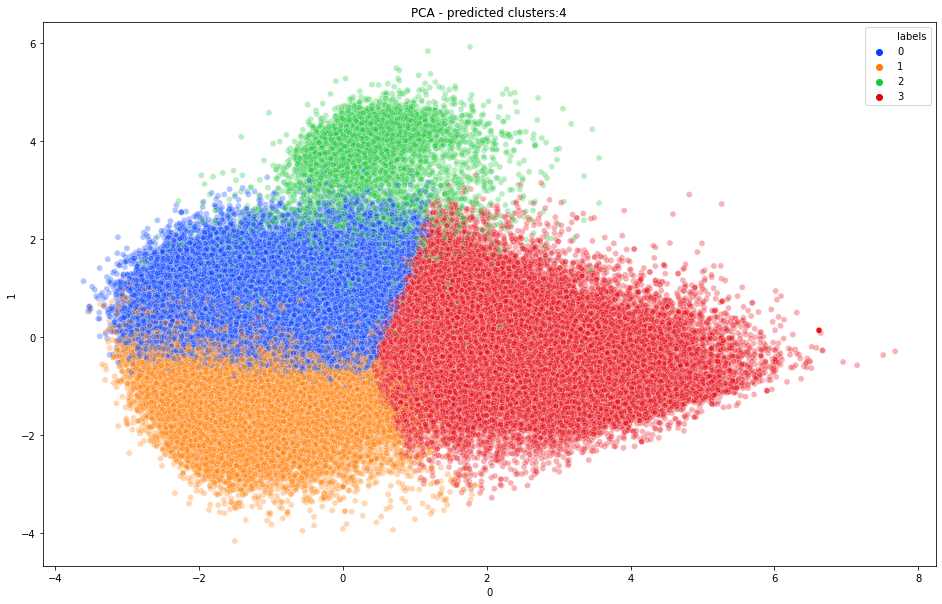

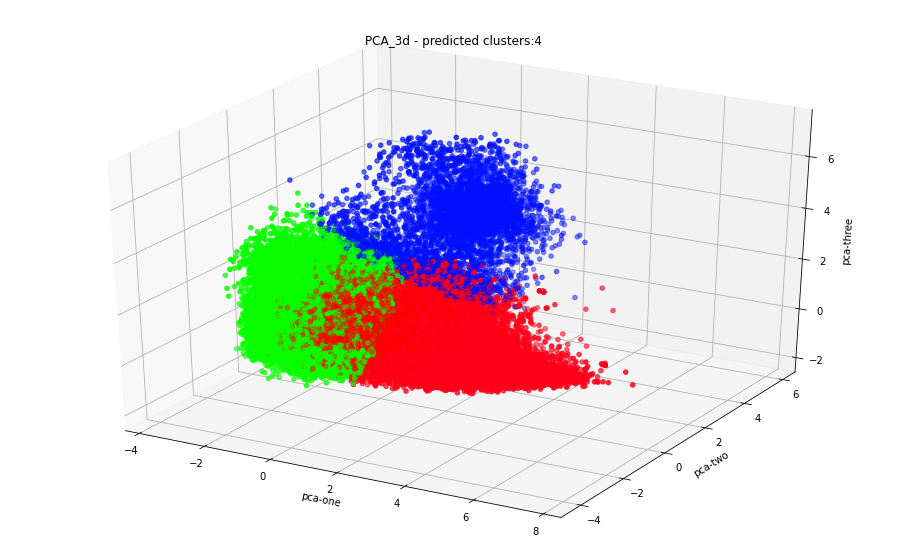

=========== KMEANS for K=5 =============
Explained variation per principal component: [0.34351661 0.15115648 0.12753335]
Silhouetter Score: 0.310


<Figure size 432x288 with 0 Axes>

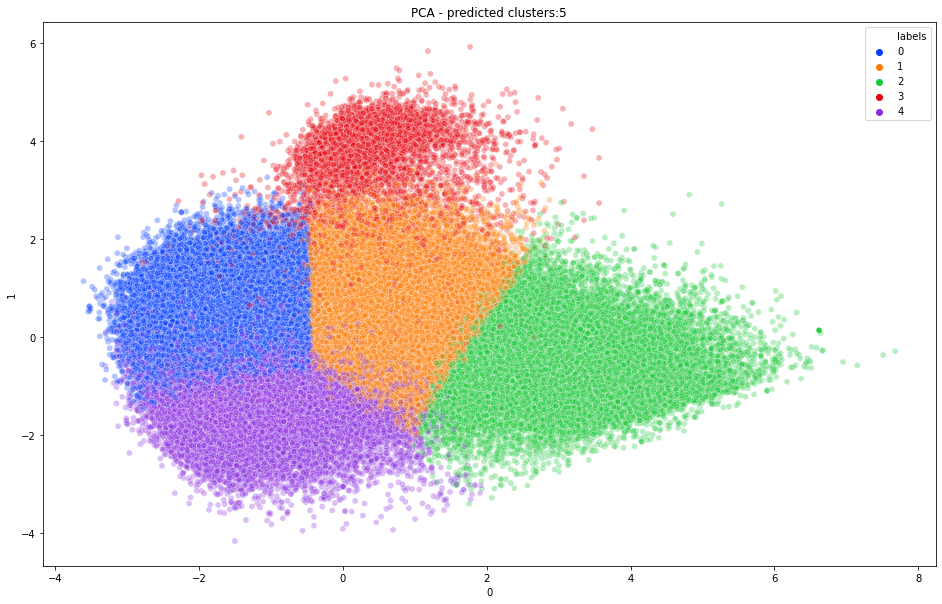

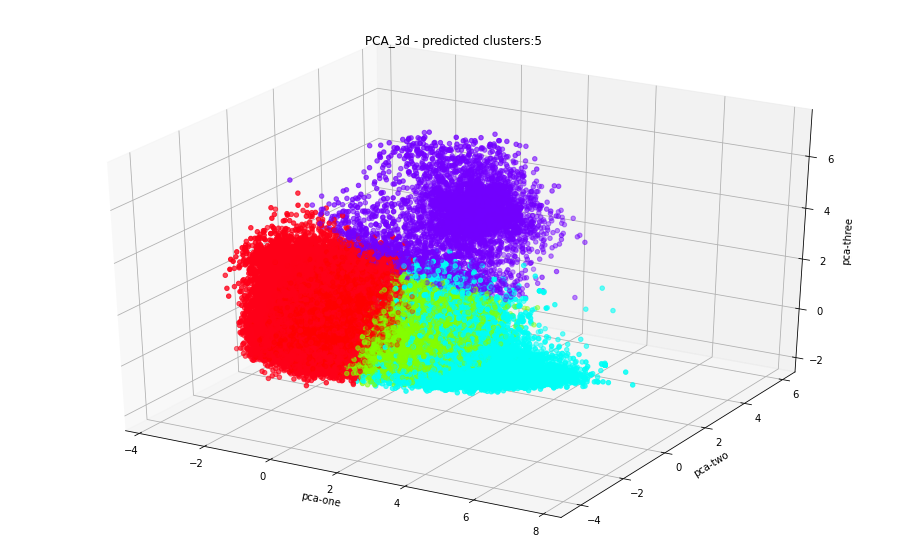

=========== KMEANS for K=6 =============
Explained variation per principal component: [0.34351661 0.15115648 0.12753335]
Silhouetter Score: 0.310


<Figure size 432x288 with 0 Axes>

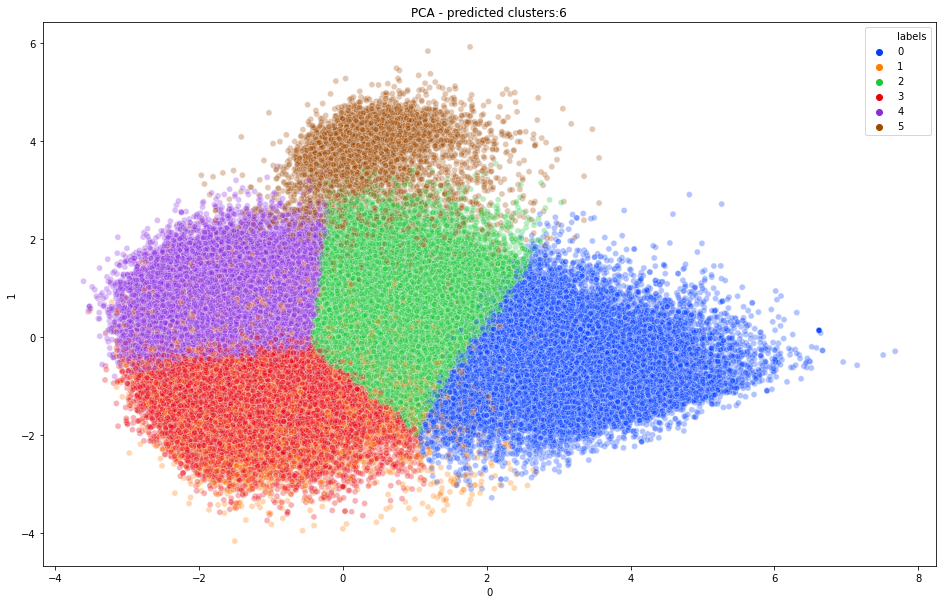

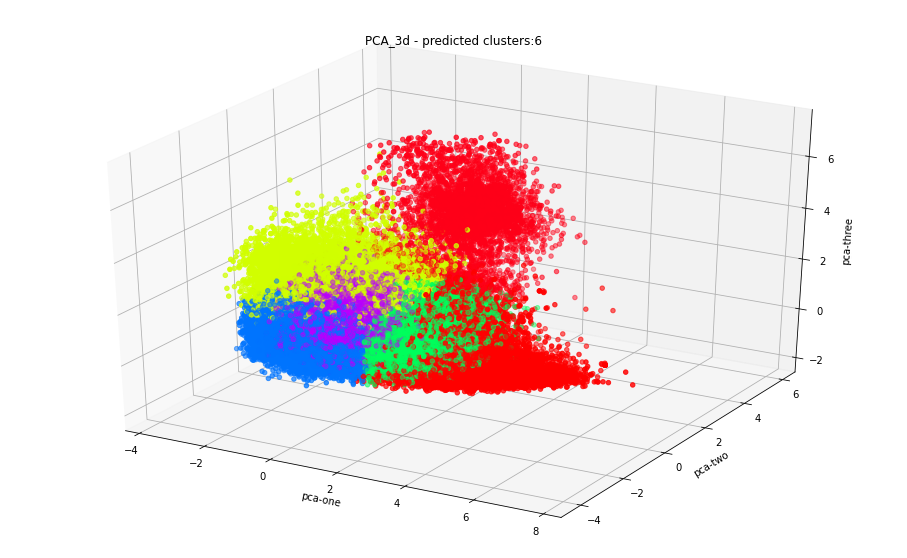

<Figure size 432x288 with 0 Axes>

In [12]:
kvals = [2,3,4,5,6]
sillhouette_scores =[]
for k in kvals:
    print("=========== KMEANS for K="+str(k)+" =============")
    X_reduced, X_new = doPCA(df)
    X_reduced, ss= doKmeans(X_new,X_reduced, n_clus=k)
    sillhouette_scores.append(ss)
    plot2d(X_reduced, "labels","predicted clusters: k="+str(k),k,color="bright")
    plot3d(X_reduced, "labels","predicted clusters: k="+str(k))

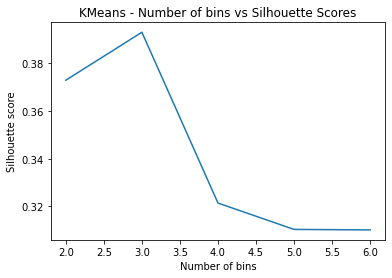

In [16]:
plt.plot(kvals, sillhouette_scores)
plt.xlabel("Number of bins")
plt.ylabel("Silhouette score")
plt.title("KMeans - Number of bins vs Silhouette Scores")
plt.show()

## Checking Accuracy

In [17]:
# For K=4, associate predicted cluster with best actual cluster, then calculate accuracy. 
X_reduced, X_new = doPCA(df)
X_reduced, ss= doKmeans(X_new,X_reduced, n_clus=4)

Explained variation per principal component: [0.34351661 0.15115648 0.12753335]
Silhouetter Score: 0.319


### comparing to year_bins

In [20]:
#Find linear assignment for predicted clusters to actual bins
# pred_to_actual = [-1,-1,-1,-1]
# for b in range(4):
#     pred_bin = X_reduced[X_reduced['labels']==b]
#     year_mode = np.array(pred_bin.mode()['year_bins'].dropna())
#     if year_mode.shape[0] == 1:
#         pred_to_actual[b] = int(year_mode[0])
#     else:
#         for most in year_mode:
#             if most not in pred_to_actual:
#                 pred_to_actual[b] = int(most)
#                 break
# pred_to_actual = np.array(pred_to_actual)
# X_reduced['converted_labels'] = pred_to_actual[X_reduced['labels']]

y_pred = X_reduced['labels']
y_true = X_reduced['year_bins']
D = max(y_pred.max(), y_true.max()) + 1
w = np.zeros((D, D), dtype=np.int64)
for i in range(y_pred.size):
    w[y_pred[i], y_true[i]] += 1
_, pred_to_actual = linear_assignment(w.max() - w)
X_reduced['converted_labels'] = pred_to_actual[X_reduced['labels']]

AUC average one-versus-one score: 0.603


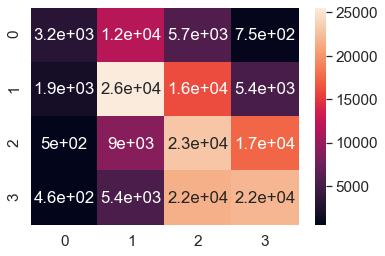

              precision    recall  f1-score   support

           0       0.53      0.15      0.23     21353
           1       0.49      0.52      0.51     48900
           2       0.35      0.46      0.40     50000
           3       0.48      0.44      0.46     49656

    accuracy                           0.43    169909
   macro avg       0.46      0.39      0.40    169909
weighted avg       0.45      0.43      0.43    169909



In [25]:
y_true = X_reduced['year_bins']
y_pred =X_reduced['converted_labels']
#Compute AUC score, Confusion matrix and Classification Report
def calculate_AUC(y_true, y_pred, pred_to_actual):
    #Binarize the output
    y_true = label_binarize(y_true, classes=np.arange(len(pred_to_actual)))
    y_pred = label_binarize(y_pred, classes=np.arange(len(pred_to_actual)))

    auc_ovo1 = roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo')
    print("AUC average one-versus-one score: %.3f" % auc_ovo1)
    return auc_ovo1

calculate_AUC(y_true, y_pred, pred_to_actual)

#Confusion Matrix 
df_cm = metrics.confusion_matrix(y_true,y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()

print(classification_report(y_true,y_pred))

In [ ]:
## comparing to popularity_cut

In [ ]:
y_pred = X_reduced['labels']
y_true = X_reduced['popularity_cut']
D = max(y_pred.max(), y_true.max()) + 1
w = np.zeros((D, D), dtype=np.int64)
for i in range(y_pred.size):
    w[y_pred[i], y_true[i]] += 1
_, pred_to_actual = linear_assignment(w.max() - w)
X_reduced['converted_labels'] = pred_to_actual[X_reduced['labels']]

AUC average one-versus-one score: 0.484


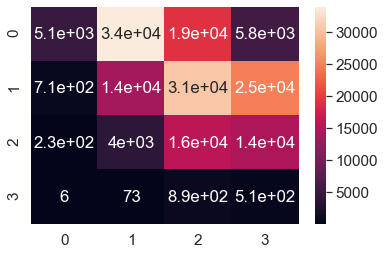

              precision    recall  f1-score   support

           0       0.84      0.08      0.15     64145
           1       0.27      0.20      0.23     69906
           2       0.24      0.46      0.31     34380
           3       0.01      0.35      0.02      1478

    accuracy                           0.21    169909
   macro avg       0.34      0.27      0.18    169909
weighted avg       0.48      0.21      0.21    169909



In [26]:
y_true = X_reduced['popularity_cut']
y_pred =X_reduced['converted_labels']
#Compute AUC score, Confusion matrix and Classification Report
def calculate_AUC(y_true, y_pred, pred_to_actual):
    #Binarize the output
    y_true = label_binarize(y_true, classes=np.arange(len(pred_to_actual)))
    y_pred = label_binarize(y_pred, classes=np.arange(len(pred_to_actual)))

    auc_ovo1 = roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo')
    print("AUC average one-versus-one score: %.3f" % auc_ovo1)
    return auc_ovo1

calculate_AUC(y_true, y_pred, pred_to_actual)

#Confusion Matrix 
df_cm = metrics.confusion_matrix(y_true,y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()

print(classification_report(y_true,y_pred))

## comparing to popularity_qcut

In [28]:
y_pred = X_reduced['labels']
y_true = X_reduced['popularity_qcut']
D = max(y_pred.max(), y_true.max()) + 1
w = np.zeros((D, D), dtype=np.int64)
for i in range(y_pred.size):
    w[y_pred[i], y_true[i]] += 1
_, pred_to_actual = linear_assignment(w.max() - w)
X_reduced['converted_labels'] = pred_to_actual[X_reduced['labels']]

AUC average one-versus-one score: 0.580


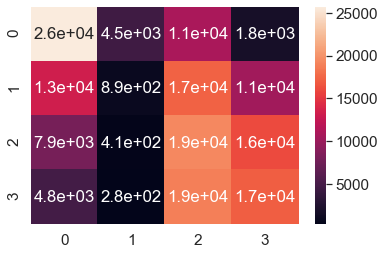

              precision    recall  f1-score   support

           0       0.50      0.60      0.54     42949
           1       0.15      0.02      0.04     42017
           2       0.29      0.44      0.35     43796
           3       0.38      0.42      0.40     41147

    accuracy                           0.37    169909
   macro avg       0.33      0.37      0.33    169909
weighted avg       0.33      0.37      0.33    169909



In [29]:
y_true = X_reduced['popularity_qcut']
y_pred =X_reduced['converted_labels']
#Compute AUC score, Confusion matrix and Classification Report
def calculate_AUC(y_true, y_pred, pred_to_actual):
    #Binarize the output
    y_true = label_binarize(y_true, classes=np.arange(len(pred_to_actual)))
    y_pred = label_binarize(y_pred, classes=np.arange(len(pred_to_actual)))

    auc_ovo1 = roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo')
    print("AUC average one-versus-one score: %.3f" % auc_ovo1)
    return auc_ovo1

calculate_AUC(y_true, y_pred, pred_to_actual)

#Confusion Matrix 
df_cm = metrics.confusion_matrix(y_true,y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()

print(classification_report(y_true,y_pred))

In [ ]:
# ============= Old code ====================
from scipy.optimize import linear_sum_assignment as linear_assignment

def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    print(ind)
    s = 0
    for k in range(len(ind)):
        i = ind[0][k]
        j = ind[1][k]
        s += w[i,j]
#     s = sum([w[i, j] for i, j in ind])
    return s * 1.0 / y_pred.size
x = cluster_acc(X_reduced['year_bins'], X_reduced['labels'])
print(x)

In [ ]:
X_new = pca.inverse_transform(X)
kmeans = KMeans(n_clusters=5).fit(X_new)

X_reduced = pca.transform(X_new)
X_reduced = pd.DataFrame(X_reduced)
X_reduced['labels'] = kmeans.labels_
X_reduced['year_bins'] = df['year_bins']

year0 = X_reduced[X_reduced['year_bins'] == 0]
year1 = X_reduced[X_reduced['year_bins'] == 1]
year2 = X_reduced[X_reduced['year_bins'] == 2]
year3 = X_reduced[X_reduced['year_bins'] == 3]
year4 = X_reduced[X_reduced['year_bins'] == 4]

df_year = year0

print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

In [ ]:
df_year = year1
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

In [ ]:
df_year = year2
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

In [ ]:
df_year = year3
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

In [ ]:
df_year = year4
print(len(df_year[df_year['labels'] == 0]))
print(len(df_year[df_year['labels'] == 1]))
print(len(df_year[df_year['labels'] == 2]))
print(len(df_year[df_year['labels'] == 3]))
print(len(df_year[df_year['labels'] == 4]))

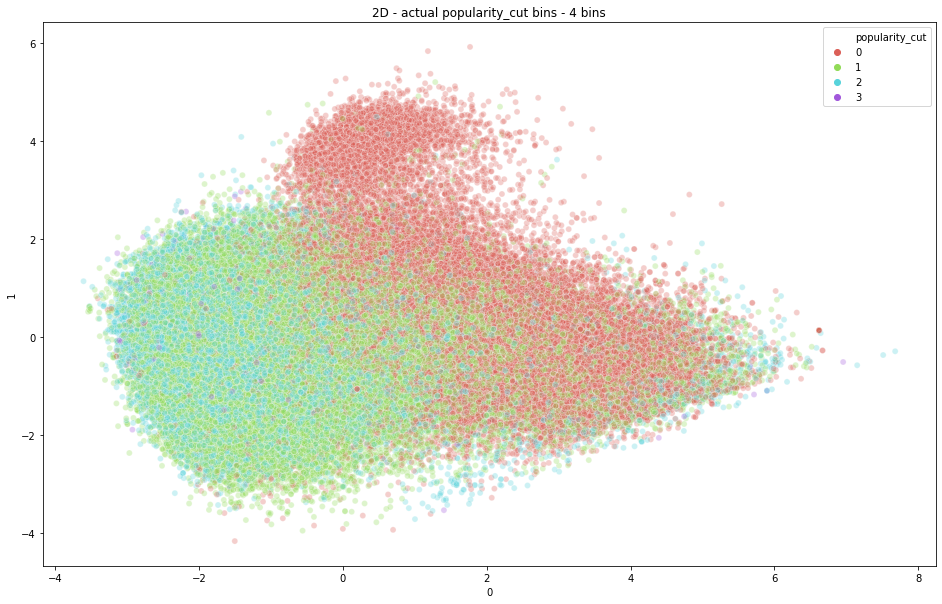

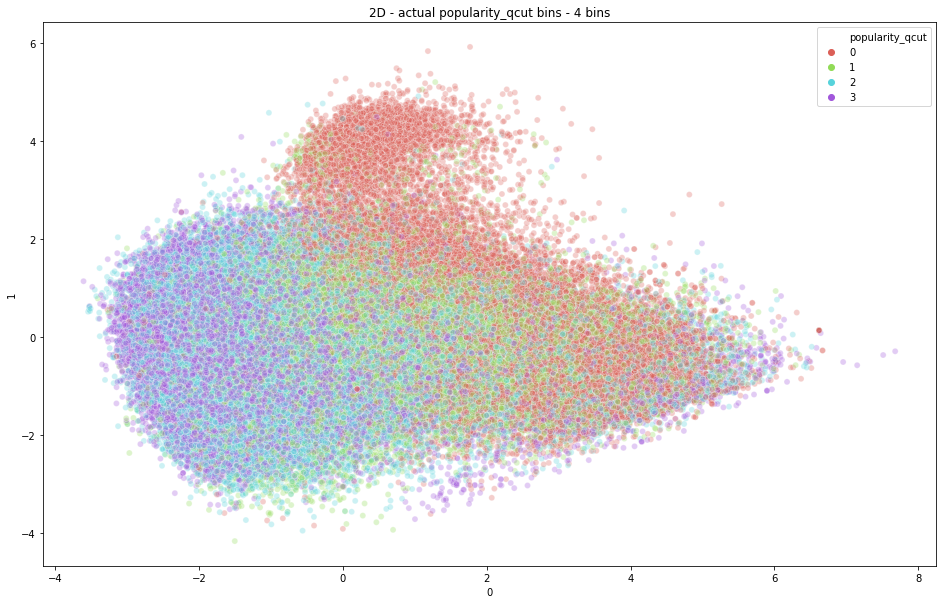

In [21]:
# Same but for popularity? 
plot2d(X_reduced, "popularity_cut","actual popularity_cut bins - 4 bins", 4)
plot2d(X_reduced, "popularity_qcut","actual popularity_qcut bins - 4 bins", 4)